# The Romer model


Imports and set magics:

In [26]:
import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm
from matplotlib import pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

The Romer model is essentially the same as the Solow model. However, technological development is now an explicit function of investments in R&D (Research and development). There exist two sectors, one generate output and one generate new knowledge. The Labor force is divided into these two sectors, such that a part of the labor force are scientists / works in the R&D sector. The equation system is given by:

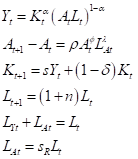

ρ is a constant productivity parameter. The parameter ϕ is the elasticity of existing knowledge (in other words, how easy it is to generate new knowledge). From ϕ we can describe two opposite effects:

Standing on shoulders: If ϕ>0 or close to 1 - new knowleadge is generated by existing ideas. 
Fishing out: If ϕ<0 - It gets harder and harder to generate new knowledge. 

λ is the efficieny of the scientists. A higher amount of working scientists results in a higher probability of two workers getting the exact same new idea, which only counts for one new idea, hence it is inefficient. This effects is called steppeing on toes and speaks for decreasing marginal product of labor in the R&D sector, hence 0<λ<1.

In the analysis we use per captia terms. Hence we can write output per capita as: 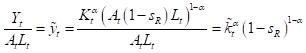

## Analytical solution

We start by solving the model analytically, identifying the steady state algebraically utilizing Sympy. As a starting point we consider the transition equation for the Romer model defined above, where we need to define the relevant parameters.
Afterwards, we use the solve function in Sympy, where we solve for capital to find the steady state equation for capital.
Now that we have the steady state value for capital, we can put it into y.
Lastly we might want to solve the steady state for actual parameter values to have get a value for capital in steady state. To accomplish this, the Sympy function Lambdify is used.

In [22]:
# Sympy symbols
k = sm.symbols('k')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s = sm.symbols('s')
sr = sm.symbols('sr')
g = sm.symbols('g')
n = sm.symbols('n')

# We find the steady state equation for capital per capita 
f = k**alpha
ssk = sm.Eq(k,((s*f*((1-sr)**(1-alpha))+(1-delta)*k)/((1+n)*(1+g))))
kss = sm.solve(ssk,k)[0]
print('The steady state of capital per capita is given by:')
display(sm.Eq(sm.symbols('k*'),kss))

# We find the steady state equation for output per capita, where we define y given the equation stated in the introduction
ystar=((1-sr)**(1-alpha))*(k**alpha)
yss=ystar.subs(k,kss)
print('The steady state of output per capita is given by:')
display(sm.Eq(sm.symbols('y*'),yss))

# Create a function of steady state capital and output
ssk_func = sm.lambdify((s,sr,g,n,delta,alpha),kss)
# Evaluate function
print('The steady state value of capital is:')
display(ssk_func(0.8,0.2,0.0977,0.01,0.1,1/3))

ssy_func = sm.lambdify((s,sr,g,n,delta,alpha),yss)
# Evaluate function
print('The steady state value of output is:')
display(ssy_func(0.8,0.2,0.0977,0.01,0.1,1/3))

The steady state of capital per capita is given by:


Eq(k*, (s*(1 - sr)**(1 - alpha)/(delta + g*n + g + n))**(-1/(alpha - 1)))

The steady state of output per capita is given by:


Eq(y*, (1 - sr)**(1 - alpha)*((s*(1 - sr)**(1 - alpha)/(delta + g*n + g + n))**(-1/(alpha - 1)))**alpha)

The steady state value of capital is:


6.005001091089144

The steady state value of output is:


1.5663820158565118

## Numerical solution

For the numerical part for the assignment, we start by defining the parameter values in the py-file "modelproject".
We use iteration to solve the equation system. 

In [30]:
from modelproject import SS_simulation
Ks, Ys, Ls, As, k_tilde, y_tilde = SS_simulation()
print(f'The steady state value of capital is {k_tilde[199]}')

The steady state value of capital is 6.0058424504998715


# Further analysis

We show the convergence towards steady state capital by using the py-file.

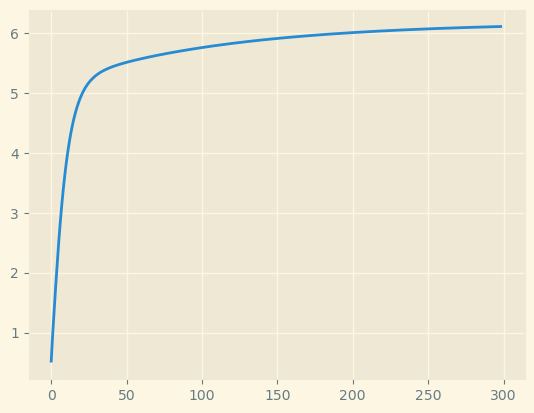

In [32]:
# Styling the plot
style = 'Solarize_Light2'
plt.style.use(style)

plt.plot(k_tilde)
plt.show()

# Conclusion

In this modelproject, we investigate the Romer model and find that the analytical and numerical steady state capital values are identical and equal to 6.00 given plausable values for the paramteres in the model. We furthermore plot the convergence of capital towards the steady state value.